(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842 

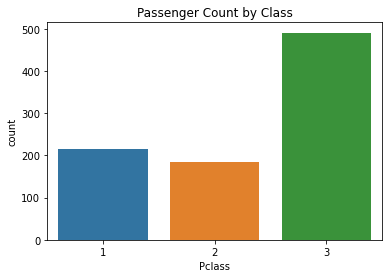

1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
                             ...                        
874                Abelson, Mrs. Samuel (Hannah Wizosky)
875                     Najib, Miss. Adele Kiamie "Jane"
879        Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
880         Shelley, Mrs. William (Imanita Parrish Hall)
887                         Graham, Miss. Margaret Edith
Name: Name, Length: 233, dtype: object
     PassengerId  Survived  Pclass                                     Name  \
7              8         0       3           Palsson, Master. Gosta Leonard   
10            11         1       3          Sandstrom, Miss. Marguerite Rut   
14            15         0       3     Vestrom, Miss. Hulda Amanda Adolfina   
16            17  

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# 1. Load dataset
df = pd.read_csv('Titanic-Dataset.csv')

# 2. Understand the data
print(df.shape)
print(df.info())
print(df.describe())

# 3. Fill missing Age using SimpleImputer
df['Age'] = SimpleImputer(strategy='mean').fit_transform(df[['Age']])

# 4. Fill Cabin with "Unknown"
df['Cabin'] = df['Cabin'].fillna('Unknown')

# 5. Fill Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# 6. Countplot for Passenger Class
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Count by Class')
plt.show()

# 7. Female survivors
print(df[(df['Sex'] == 'female') & (df['Survived'] == 1)]['Name'])

# 8. 3rd class passengers under 18
print(df[(df['Pclass'] == 3) & (df['Age'] < 18)])

# 9. Class 1 and Age > 40
class1_over40 = df[(df['Pclass'] == 1) & (df['Age'] > 40)]
print(class1_over40)

# 10. Survivors from above group
print(class1_over40[class1_over40['Survived'] == 1])

# 11. Male passengers with Fare > 100
print(df[(df['Sex'] == 'male') & (df['Fare'] > 100)])

# 12. Embarked from 'C' and Class 2
print(df[(df['Embarked'] == 'C') & (df['Pclass'] == 2)])

# 13. More than 2 siblings/spouses aboard
print(df[df['SibSp'] > 2])

# 14. Did not survive and no family aboard
print(df[(df['Survived'] == 0) & (df['SibSp'] == 0) & (df['Parch'] == 0)])

# 15. Top 5 oldest survivors
print(df[df['Survived'] == 1].sort_values(by='Age', ascending=False).head(5))

# 16. Passengers with zero Fare
print(df[df['Fare'] == 0])

# 17. Train-test split
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)